In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import lfilter

In [12]:
test1 = pd.read_csv("data/result_test_1.csv", sep=";")
test1_data = test1.to_numpy()
test1.head()

,# timestamp,imu_1_accel x,imu_1_accel y,imu_1_accel z,imu_1_gyro x,imu_1_gyro y,imu_1_gyro z,imu_2_accel x,imu_2_accel y,imu_2_accel z,imu_2_gyro x,imu_2_gyro y,imu_2_gyro z,encoder_1,encoder_2,force_1,force_2
0,0.000000,-1500.0,444.0,16108.0,539.0,-63.0,-21.0,-2356.0,2308.0,-17064.0,-203.0,148.0,-106.0,3.0,0.0,816.0,0.0
1,0.017918,-15372.0,5316.0,-3108.0,506.0,-531.0,240.0,-2256.0,2300.0,-17260.0,-245.0,123.0,-90.0,3.0,0.0,832.0,0.0
2,0.035837,-15160.0,5248.0,-3024.0,-1507.0,664.0,-455.0,-2196.0,2180.0,-17192.0,-157.0,73.0,-145.0,3.0,0.0,1136.0,0.0
3,0.053755,-15184.0,5352.0,-2996.0,-2140.0,827.0,-1029.0,-2308.0,2320.0,-17224.0,-128.0,82.0,-138.0,3.0,0.0,528.0,0.0
4,0.071674,-15348.0,5404.0,-3032.0,-1212.0,553.0,-221.0,-2396.0,2248.0,-17212.0,-150.0,73.0,-119.0,3.0,0.0,1712.0,0.0


In [16]:
test2 = pd.read_csv("data/result_test_2.csv", sep=";")
test2_data = test2.to_numpy()
test3 = pd.read_csv("data/result_test_3.csv", sep=";")
test3_data = test3.to_numpy()

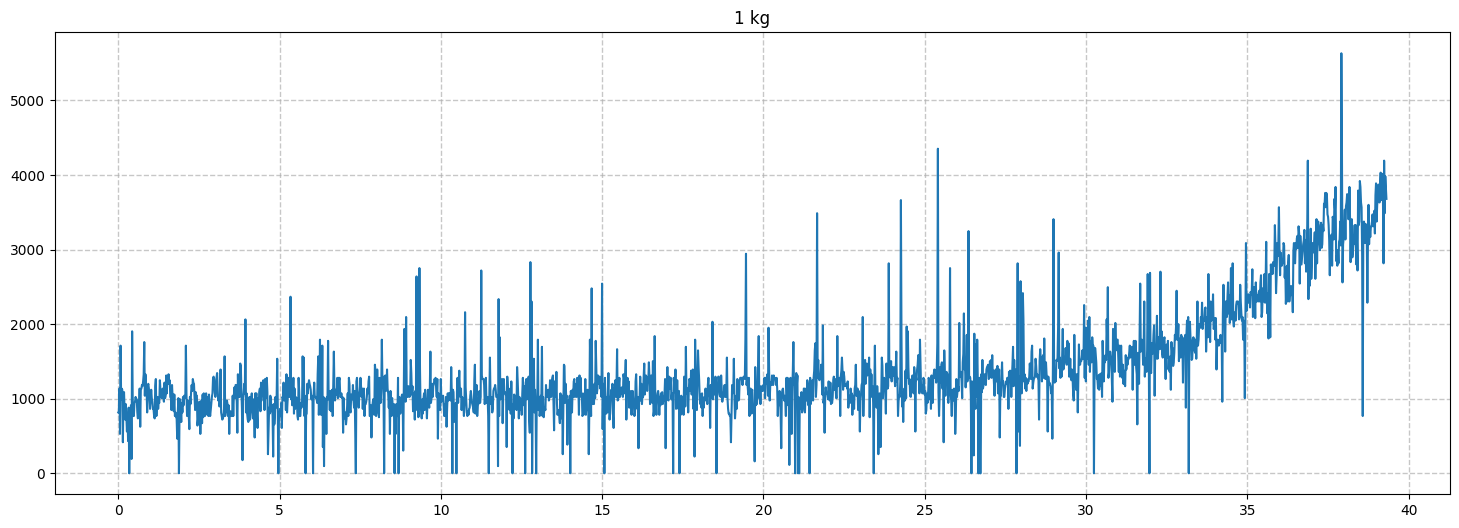

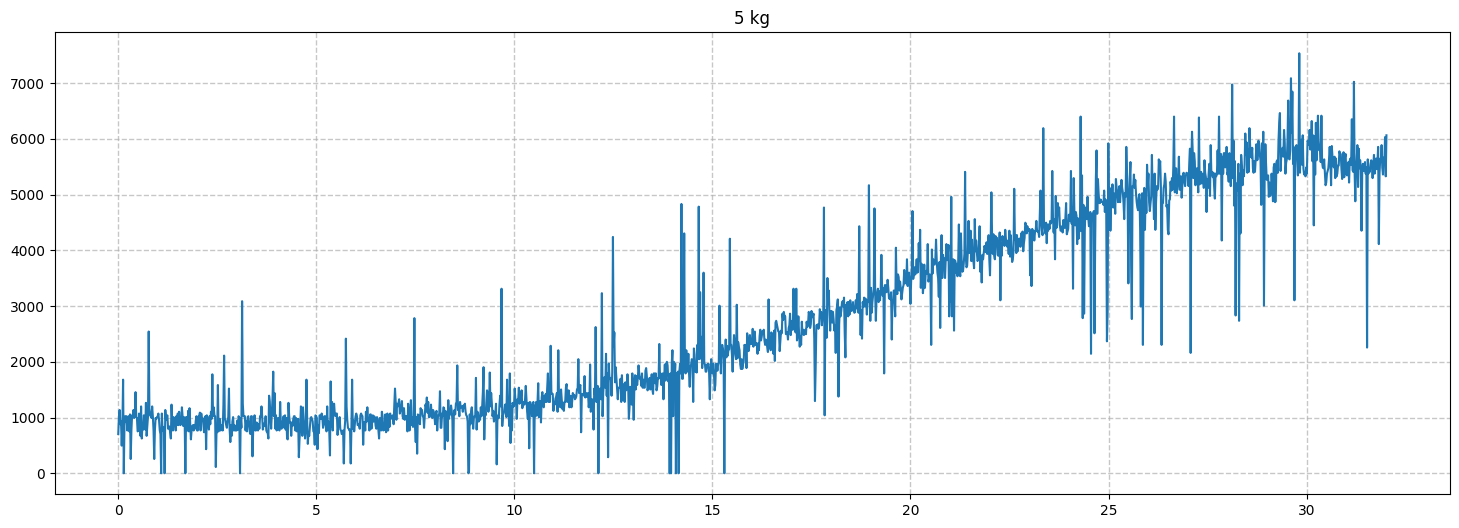

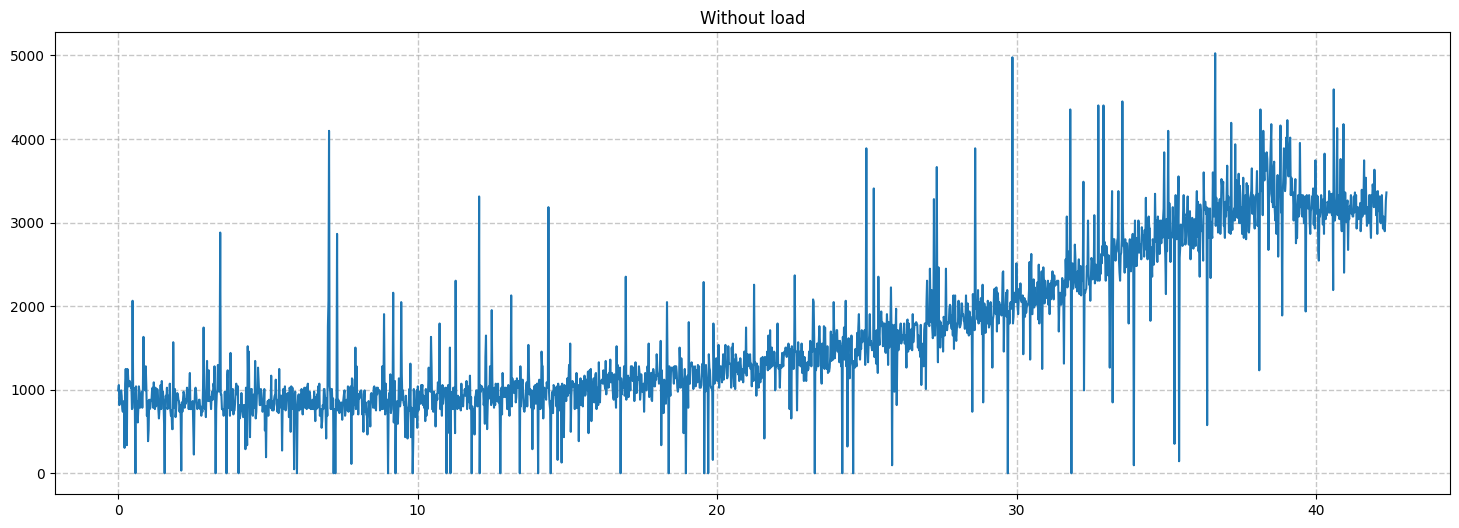

In [18]:
plt.figure(figsize=(18, 6))
plt.title("1 kg")
plt.plot(test1_data[:, 0], test1_data[:, 15])
plt.grid(True, linestyle="--", linewidth=1, alpha=0.7)
plt.show()

plt.figure(figsize=(18, 6))
plt.title("5 kg")
plt.plot(test2_data[:, 0], test2_data[:, 15])
plt.grid(True, linestyle="--", linewidth=1, alpha=0.7)
plt.show()

plt.figure(figsize=(18, 6))
plt.title("Without load")
plt.plot(test3_data[:, 0], test3_data[:, 15])
plt.grid(True, linestyle="--", linewidth=1, alpha=0.7)
plt.show()


In [26]:
def moving_average_filter(data, window_size):
    """
    Applies a moving average filter to a 1D array of sensor data.

    Args:
        data (np.array): 1D array of sensor data.
        window_size (int): Size of the moving average window.

    Returns:
        np.array: Filtered sensor data.
    """
    filtered_data = np.zeros_like(data)
    for i in range(len(data)):
        if i < window_size:
            filtered_data[i] = np.mean(data[:i+1])
        else:
            filtered_data[i] = np.mean(data[i-window_size+1:i+1])
    return filtered_data

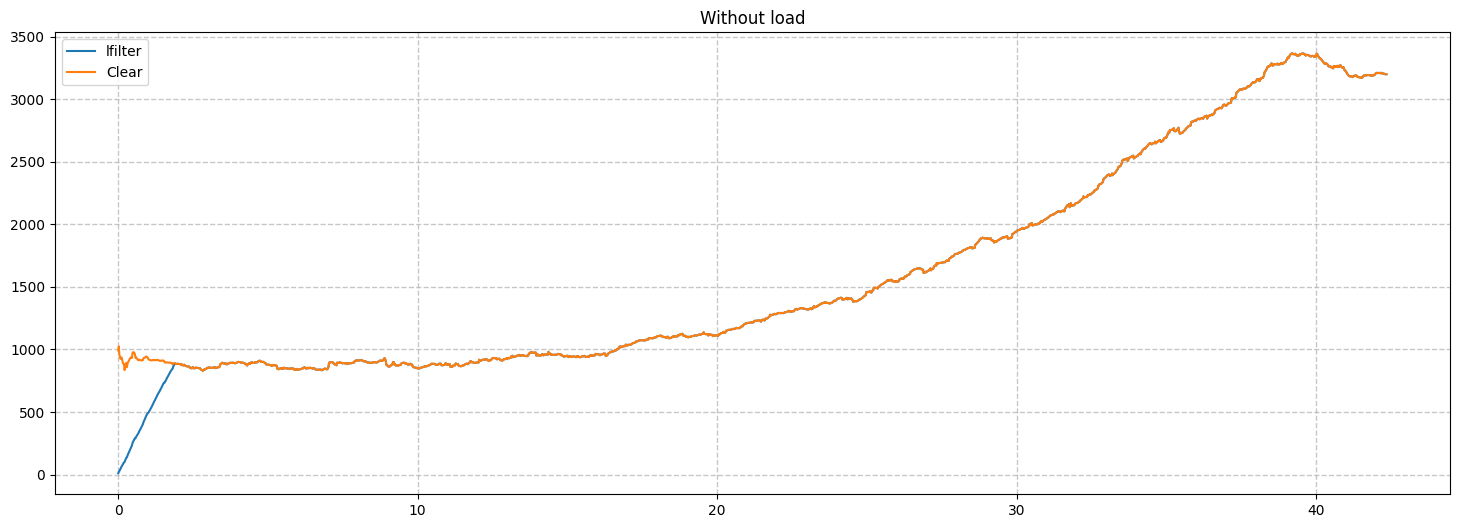

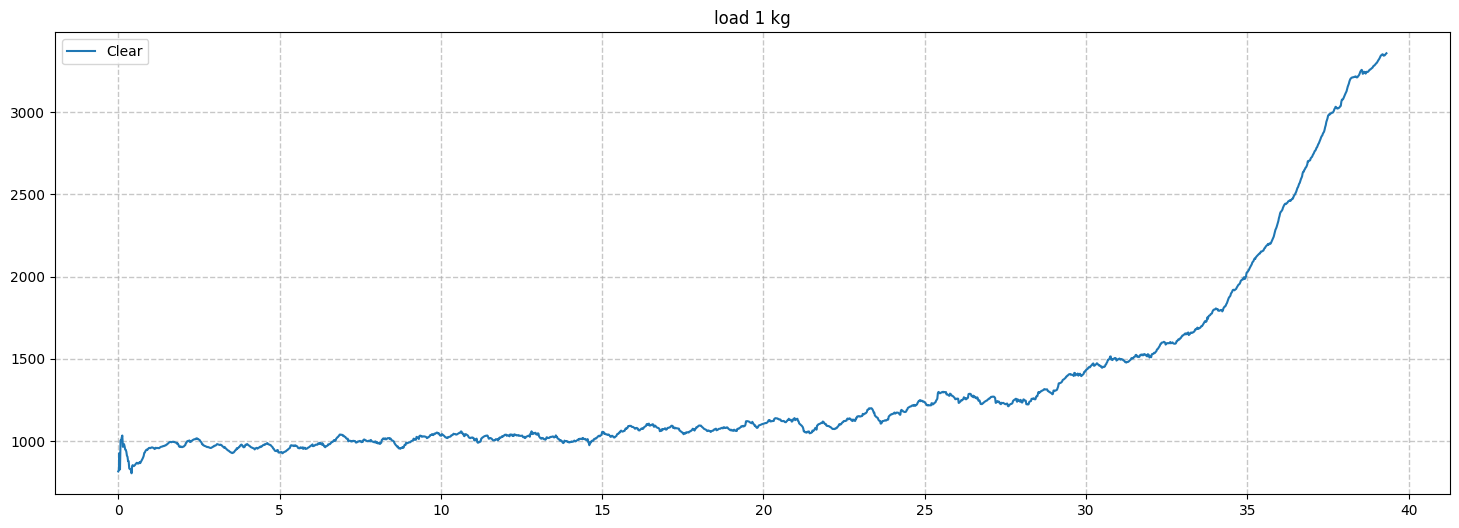

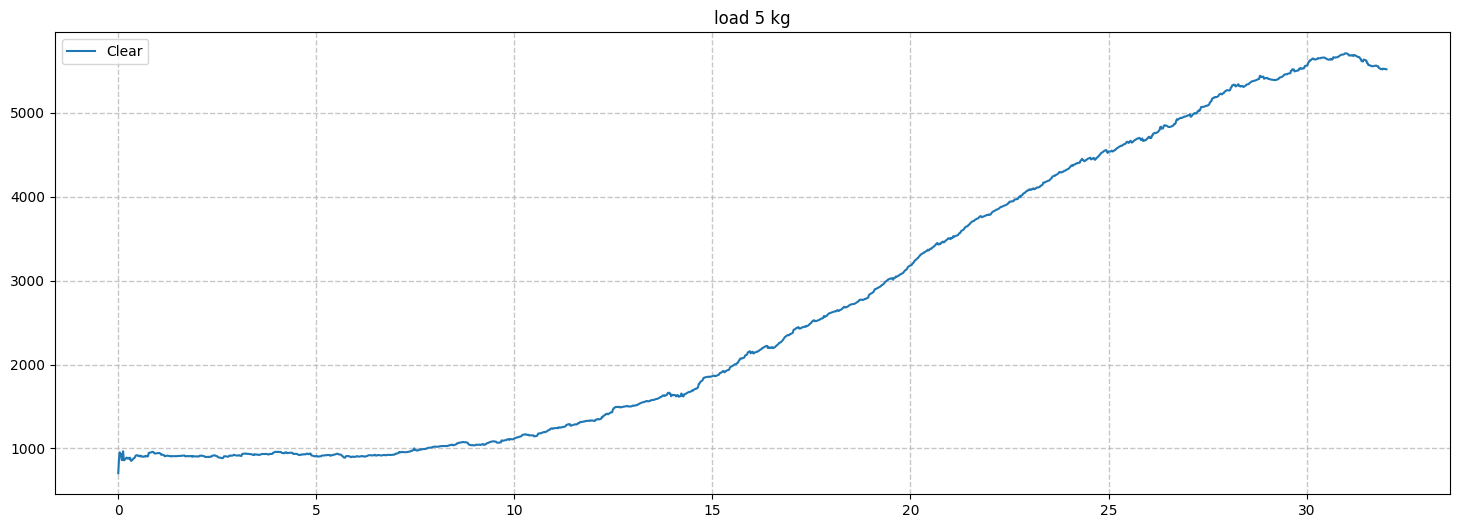

In [40]:
n = 100  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
yy = lfilter(b, a, test3_data[:, 15])

plt.figure(figsize=(18, 6))
plt.title("Without load")
# plt.plot(test3_data[:, 0], test3_data[:, 15], alpha=0.7, label="Noizy")
plt.plot(test3_data[:, 0], yy, label="lfilter")
plt.plot(test3_data[:, 0], moving_average_filter(test3_data[:, 15], 100), label="Clear")
plt.grid(True, linestyle="--", linewidth=1, alpha=0.7)
plt.legend()
plt.show()

plt.figure(figsize=(18, 6))
plt.title("load 1 kg")
# plt.plot(test1_data[:, 0], test1_data[:, 15], alpha=0.7, label="Noizy")
plt.plot(test1_data[:, 0], moving_average_filter(test1_data[:, 15], 100), label="Clear")
plt.grid(True, linestyle="--", linewidth=1, alpha=0.7)
plt.legend()
plt.show()

plt.figure(figsize=(18, 6))
plt.title("load 5 kg")
# plt.plot(test2_data[:, 0], test2_data[:, 15], alpha=0.7, label="Noizy")
plt.plot(test2_data[:, 0], moving_average_filter(test2_data[:, 15], 100), label="Clear")
plt.grid(True, linestyle="--", linewidth=1, alpha=0.7)
plt.legend()
plt.show()
